# 05/22/20
# This notebook plays with data visualization of LinKS/autoz catalogs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

In [2]:
links = pd.read_csv('/home/shawn/Desktop/LinKS_autoz/files/csv/links_autoz052220.csv')
links_identified = pd.read_csv('/home/shawn/Desktop/LinKS_autoz/files/csv/links_identified_autoz052220.csv')

In [3]:
# let's focus on the links_identified for now
# create subclasses for each: PG + ELG (lens), ELG + PG, ELG + ELG, PG + PG
lid = links_identified

pg_elg1 = lid[(lid.z1 < lid.z2) & (lid.template1 >=40) & (lid.template1 <= 42) 
             & (lid.template2 > 42) & (lid.template2 <= 47)]
pg_elg2 = lid[(lid.z1 > lid.z2) & (lid.template2 >=40) & (lid.template2 <= 42)
             & (lid.template1 > 42) & (lid.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])

elg_pg1 = lid[(lid.z1 < lid.z2) & (lid.template2 >=40) & (lid.template2 <= 42)
             & (lid.template1 > 42) & (lid.template1 <= 47)]
elg_pg2 = lid[(lid.z1 > lid.z2) & (lid.template1 >=40) & (lid.template1 <= 42)
             & (lid.template2 > 42) & (lid.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])

elg_elg = lid[(lid.template2 >= 40) & (lid.template2 <= 42) & (lid.template1 >=40 ) & (lid.template1 <= 42)]
pg_pg = lid[(lid.template1 > 42) & (lid.template2 <= 47) & (lid.template2 > 42) & (lid.template2 <= 47)]


print(len(pg_elg), len(elg_pg), len(elg_elg), len(pg_pg))

10 9 8 2


In [105]:
# PG + ELG : 10
# ELG + PG : 9
# ELG + ELG : 8
# PG + PG: 2
len(lid.dropna())
# Matches number of 31 with autoz spec.

31

In [104]:
# What about duplicates?
print(len(lid.drop_duplicates()))
# 51 (didn't drop any)

# number of unique entries
print(lid.GAMA_ID.nunique())

# value counts shows duplicates
print(lid.GAMA_ID.value_counts())
# 544226, 3629152, 3911769, and 3882191 have duplicates

51
47
544226.0     2
3629152.0    2
3911769.0    2
3882191.0    2
585328.0     1
107432.0     1
231281.0     1
249703.0     1
250289.0     1
619609.0     1
15790.0      1
173045.0     1
165871.0     1
49576.0      1
3899011.0    1
197972.0     1
64911.0      1
136604.0     1
3599660.0    1
231282.0     1
663364.0     1
371400.0     1
298994.0     1
345423.0     1
583457.0     1
125077.0     1
279505.0     1
204703.0     1
386188.0     1
584826.0     1
98583.0      1
145278.0     1
569270.0     1
323152.0     1
3575500.0    1
561459.0     1
124486.0     1
561967.0     1
568366.0     1
92606.0      1
3883690.0    1
568617.0     1
186586.0     1
92918.0      1
165409.0     1
376338.0     1
41064.0      1
Name: GAMA_ID, dtype: int64
47


47

[Text(0, 0.5, 'z1'),
 Text(0.5, 0, 'z2'),
 Text(0.5, 1.0, 'LinKS/GAMA Candidates Templates')]

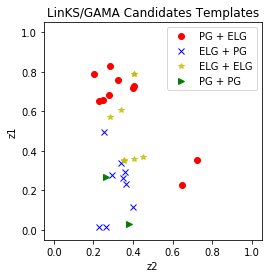

In [14]:
# Plot z1 to z2
fig, ax = plt.subplots()
ax.plot(pg_elg.z1, pg_elg.z2, 'ro', label = 'PG + ELG')
ax.plot(elg_pg.z1, elg_pg.z2, 'bx', label = 'ELG + PG')
ax.plot(elg_elg.z1, elg_elg.z2, 'y*', label = 'ELG + ELG', alpha = 0.75)
ax.plot(pg_pg.z1, pg_pg.z2, 'g>', label = 'PG + PG')
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect(1)
ax.legend()
ax.set(title = 'LinKS/GAMA Candidates Templates',
      ylabel = 'z1',
      xlabel = 'z2')

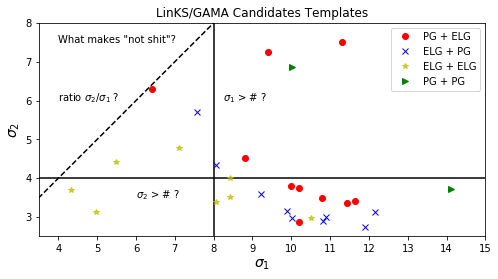

In [109]:
# Plot sigma1 vs sigma2 for all candidates in links_identified


fig, ax = plt.subplots(figsize=(8,6)) # square dimensions


ax.plot(x, x, 'k--') # line of slope 1
ax.axvline(x = 8, color = 'k')
ax.axhline(y = 4, color = 'k')
# data
ax.plot(pg_elg.sigma1, pg_elg.sigma2, 'ro', label = 'PG + ELG')
ax.plot(elg_pg.sigma1, elg_pg.sigma2, 'bx', label = 'ELG + PG')
ax.plot(elg_elg.sigma1, elg_elg.sigma2, 'y*', label = 'ELG + ELG', alpha = 0.75)
ax.plot(pg_pg.sigma1, pg_pg.sigma2, 'g>', label = 'PG + PG')

# axis settings
ax.set_xlim(3.5, 15)
ax.set_xticks(np.linspace(4, 15, 12))
ax.set_ylim(2.5, 8)
ax.set_aspect('equal')
ax.set_ylabel('$\sigma_2$', fontsize = 14)
ax.set_xlabel('$\sigma_1$', fontsize = 14)

# questions for Benne
ax.text(4, 7.5, 'What makes "not shit"?')
ax.text(4, 6, 'ratio $\sigma_2/\sigma_1$ ?')
ax.text(6, 3.5, '$\sigma_2$ > # ?')
ax.text(8.25, 6, '$\sigma_1$ > # ?')

ax.legend()
ax.set(title = 'LinKS/GAMA Candidates Templates')

#plt.savefig('/home/shawn/Desktop/LinKS_autoz/visuals/png/sigma_comparison_052220.png')

plt.show()

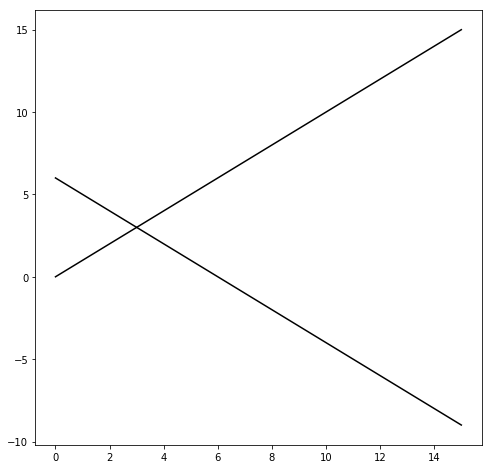

In [70]:
fig, ax = plt.subplots(figsize=(8,8)) # square dimensions


#ax.set_xlim(0,0.8)
#ax.set_ylim(0,0.8)
#X = spec.z1
#Y = spec.z2
ax.plot(x, x, 'k-') # line of slope 1
ax.plot(x, -x + 6, 'k-')